In [1]:
import pandas, numpy, seaborn

In [2]:
import sklearn, sklearn.decomposition, sklearn.decomposition, sklearn.pipeline, sklearn.preprocessing

In [3]:
import scipy, scipy.signal

In [4]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':30, 'ytick.labelsize':30, 'axes.labelsize':40, 'figure.figsize':(12, 8)})

In [5]:
import cycler
colors = matplotlib.pyplot.get_cmap('tab20').colors
new_cycler = cycler.cycler(color=colors)
matplotlib.rcParams.update({'axes.prop_cycle':new_cycler})

# 0. user-defined variables

In [6]:
tpm_file = '/home/adrian/projects/brca2/results/tpm/DESeq2_TPM_values.tsv'

# 1. read info

In [7]:
tpm = pandas.read_csv(tpm_file, sep='\t', index_col=0)
print(tpm.shape)
tpm.head()

(40320, 56)


,3548_93T,4041_03,489_92T,5610_99T,71_04,7117_95T,7584_99T,78_99T,H0029_06T,H0060_92T,...,H6603_03T,H6723_03T,H6735_03T,H6894_05T,H6933_91T,H7073_97T,H7434_03T,H7682_04T,H7736_96T,H8451_90T
ENSG00000000003,26.766219,9.463354,30.877985,7.263889,24.809817,24.085589,20.824613,81.949989,29.208321,0.422245,...,9.717501,15.319927,21.458924,8.633428,13.399244,31.533433,32.040359,36.038168,8.193737,32.261855
ENSG00000000005,0.136637,0.400602,1.741121,1.331669,0.035789,0.046481,0.458578,2.666606,2.291617,0.000000,...,0.527966,0.000000,1.502382,0.000000,0.318929,0.321423,0.061723,0.031914,2.288609,0.000000
ENSG00000000419,50.761126,36.740165,39.110054,75.423530,89.634647,62.144922,43.337556,82.663730,150.490263,3.046220,...,64.533528,75.170512,79.955202,50.967336,18.222344,53.895662,74.837104,116.226755,29.877649,9.463296
ENSG00000000457,3.679068,7.078772,3.238248,16.815805,31.559955,7.412081,7.865294,20.967178,24.503196,0.178591,...,16.847472,20.601097,7.384273,13.295549,1.840042,15.978522,15.557411,23.677903,3.741481,1.599766
ENSG00000000460,5.521010,6.052516,6.220388,16.950546,17.399173,4.822419,4.436591,11.914715,34.878188,0.379387,...,11.711035,10.408858,6.852222,8.584908,3.747373,9.796059,13.533366,6.771201,4.642842,6.004293


In [8]:
expressed_genes = tpm[tpm.max(axis=1) >= 10]
expressed_genes.shape

(16546, 56)

In [9]:
log2_tpm_PO = numpy.log2(expressed_genes + 1)
log2_tpm_PO.head()

,3548_93T,4041_03,489_92T,5610_99T,71_04,7117_95T,7584_99T,78_99T,H0029_06T,H0060_92T,...,H6603_03T,H6723_03T,H6735_03T,H6894_05T,H6933_91T,H7073_97T,H7434_03T,H7682_04T,H7736_96T,H8451_90T
ENSG00000000003,4.795259,3.387274,4.994489,3.046821,4.689848,4.648787,4.447884,6.374170,4.916874,0.508170,...,3.421897,4.028563,4.489217,3.268049,3.847921,5.023851,5.046157,5.210941,3.200651,5.055797
ENSG00000000419,5.693797,5.238029,5.325892,6.255945,6.501991,5.980595,5.470457,6.386530,7.243081,2.016575,...,6.034161,6.251161,6.339052,5.699533,4.264712,5.778620,6.244832,6.873158,4.948491,3.387265
ENSG00000000457,2.226221,3.014136,2.083468,4.155086,5.025027,3.072463,3.148169,4.457278,4.672606,0.237064,...,4.157648,4.433033,3.067686,3.837494,1.505912,4.085639,4.049405,4.625148,2.245338,1.378382
ENSG00000000460,2.705095,2.818138,2.852076,4.165956,4.201569,2.541619,2.442702,3.690944,5.165035,0.464027,...,3.668010,3.512082,2.973101,3.260765,2.247129,3.432433,3.861297,2.958138,2.496422,2.808240
ENSG00000000938,1.154023,3.433561,1.763643,3.193144,1.797181,2.786110,2.742832,2.022707,2.719964,0.468305,...,3.843904,2.966744,2.403838,3.529448,1.321074,2.040231,2.253565,2.026264,1.939433,1.442994


# 2. bring data to log2 TPM

# 3. histogram

180
18.103338527268015


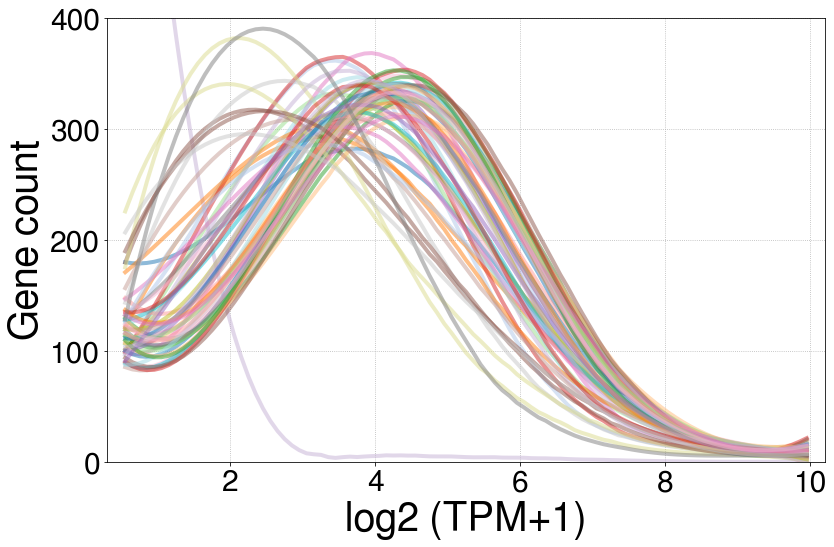

In [10]:
found_max = 18
number_of_bins = found_max*10
print(number_of_bins)

absolute_max = 0
working_samples = log2_tpm_PO.columns.to_list()

most_likely_expressions = []
all_hats = []
for sample in working_samples:
    
    log2TPM = log2_tpm_PO.loc[:, sample]
    if max(log2TPM) > absolute_max:
        absolute_max = max(log2TPM)
        
    #print(numpy.min(log2TPM), numpy.max(log2TPM))
        
    hist, bin_edges = numpy.histogram(log2TPM, bins=number_of_bins, range=(0, found_max))
    half_bin = (bin_edges[1] - bin_edges[0])/2
    x = bin_edges + half_bin
    x = x[:-1]
    
    #print(x)
    #print(hist)
   
    plotting_x = x[5:100]
    plotting_hist = hist[5:100]
    #print(plotting_x)
    
    #matplotlib.pyplot.plot(plotting_x, plotting_hist, '.', alpha=1/3)
    
    yhat = scipy.signal.savgol_filter(plotting_hist, 51, 3)
    matplotlib.pyplot.plot(plotting_x, yhat, '-', lw=4, alpha=1/2)
    
    most_likely_expression = x[numpy.argmax(yhat)]
    most_likely_expressions.append(most_likely_expression)
    
    all_hats.append(yhat)
    
    
matplotlib.pyplot.xlim([numpy.min(plotting_x)-0.25, numpy.max(plotting_x)+0.25])
matplotlib.pyplot.ylim([0, 400])

matplotlib.pyplot.xlabel('log2 (TPM+1)')
matplotlib.pyplot.ylabel('Gene count')
matplotlib.pyplot.grid(ls=':')
#matplotlib.pyplot.legend(ncol=10, fontsize=12, bbox_to_anchor=(1.02, 1.25))

matplotlib.pyplot.tight_layout()

print(absolute_max)

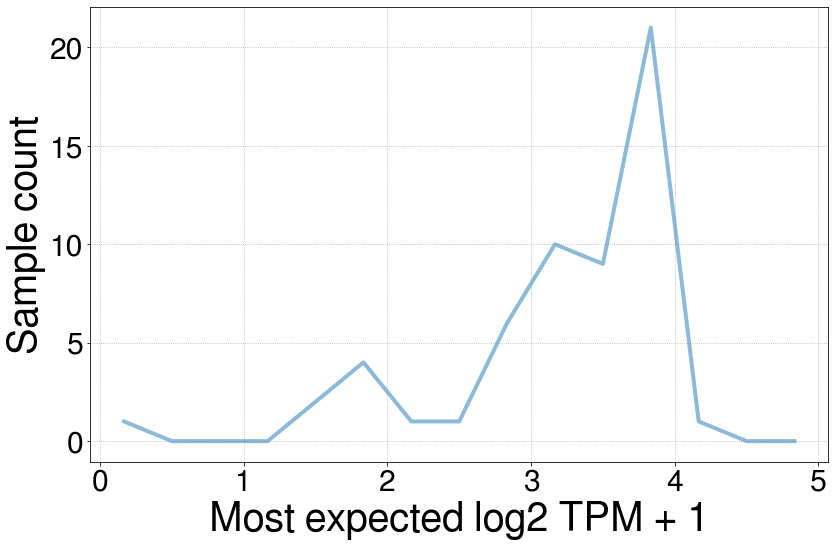

In [11]:
hist, bin_edges = numpy.histogram(most_likely_expressions, bins=15, range=(0, 5))
half_bin = (bin_edges[1] - bin_edges[0])/2
x = bin_edges + half_bin
x = x[:-1]

matplotlib.pyplot.plot(x, hist, '-', lw=4, alpha=1/2)
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.xlabel('Most expected log2 TPM + 1')
matplotlib.pyplot.ylabel('Sample count')
matplotlib.pyplot.tight_layout()

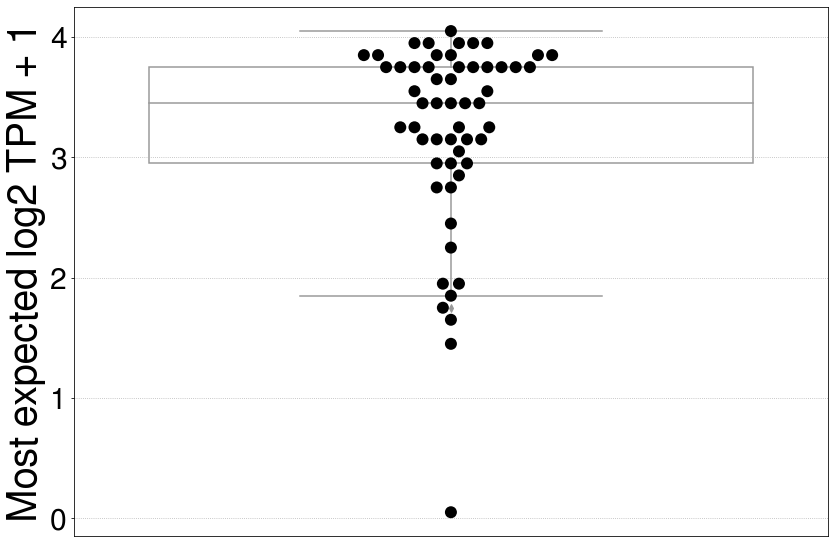

In [12]:
seaborn.boxplot(data=most_likely_expressions, color='white')
seaborn.swarmplot(data=most_likely_expressions, color='black', size=12)
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.ylabel('Most expected log2 TPM + 1')
matplotlib.pyplot.xticks([])
matplotlib.pyplot.tight_layout()

In [13]:
median = numpy.median(most_likely_expressions)
std = numpy.std(most_likely_expressions)
threshold = median - 1.96*std
print(median, std, threshold)
print()

new_threshold = 2.5
suspicious_samples = []
for i in range(len(most_likely_expressions)):
    if most_likely_expressions[i] <= new_threshold:
        print(working_samples[i], new_threshold, most_likely_expressions[i])
        suspicious_samples.append(working_samples[i])
print(suspicious_samples)

3.45 0.7871091514691787 1.90726606312041

H0060_92T 2.5 0.05
H0343_03T 2.5 1.85
H2169_94N 2.5 1.6500000000000001
H4750_92T 2.5 2.45
H5353_92N 2.5 2.25
H5667_92T 2.5 1.4500000000000002
H6933_91T 2.5 1.9500000000000002
H7736_96T 2.5 1.9500000000000002
H8451_90T 2.5 1.7500000000000002
['H0060_92T', 'H0343_03T', 'H2169_94N', 'H4750_92T', 'H5353_92N', 'H5667_92T', 'H6933_91T', 'H7736_96T', 'H8451_90T']


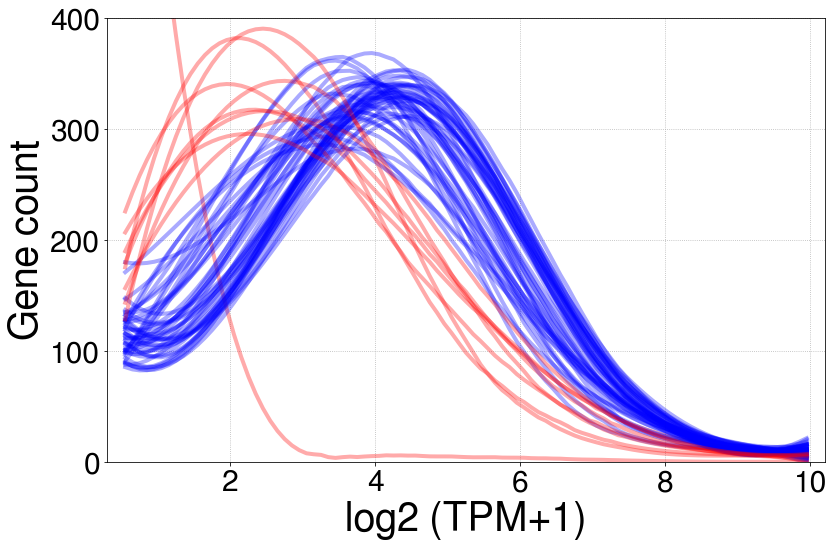

In [14]:
for i in range(len(working_samples)):
    if working_samples[i] in suspicious_samples:
        matplotlib.pyplot.plot(plotting_x, all_hats[i], '-', lw=4, alpha=1/3, color='red')
    else:
        matplotlib.pyplot.plot(plotting_x, all_hats[i], '-', lw=4, alpha=1/3, color='blue')
    
matplotlib.pyplot.xlim([numpy.min(plotting_x)-0.25, numpy.max(plotting_x)+0.25])
matplotlib.pyplot.ylim([0, 400])

matplotlib.pyplot.xlabel('log2 (TPM+1)')
matplotlib.pyplot.ylabel('Gene count')
matplotlib.pyplot.grid(ls=':')
#matplotlib.pyplot.legend(ncol=10, fontsize=12, bbox_to_anchor=(1.02, 1.25))

matplotlib.pyplot.tight_layout()

# 4. PCA

In [15]:
transpose = log2_tpm_PO.transpose()
print(transpose.shape)
transpose.head()

(56, 16546)


,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000286075,ENSG00000286095,ENSG00000286140,ENSG00000286151,ENSG00000286156,ENSG00000286190,ENSG00000286219,ENSG00000286220,ENSG00000286261,ENSG00000286264
3548_93T,4.795259,5.693797,2.226221,2.705095,1.154023,2.068908,5.771374,3.879821,4.928688,2.798928,...,3.182531,0.696219,2.613632,0.000000,1.886382,0.536390,4.153422,0.975168,1.181845,1.928823
4041_03,3.387274,5.238029,3.014136,2.818138,3.433561,5.806018,4.814918,3.934571,3.544059,1.891502,...,2.560238,1.210422,1.206005,0.251221,0.853227,2.366494,2.984337,2.059575,2.158657,2.070477
489_92T,4.994489,5.325892,2.083468,2.852076,1.763643,2.503638,3.738965,3.293313,3.244626,2.760623,...,3.006296,2.335554,2.669801,0.000000,1.944108,1.725561,4.700289,2.026249,2.461428,4.092617
5610_99T,3.046821,6.255945,4.155086,4.165956,3.193144,3.483378,4.852348,3.857204,4.801880,3.342813,...,3.568772,2.963421,2.883825,0.245676,2.676279,3.070028,4.775112,2.705476,3.246938,4.248608
71_04,4.689848,6.501991,5.025027,4.201569,1.797181,4.613685,4.824844,5.566846,5.202744,3.318328,...,4.215290,1.057016,1.518786,0.000000,1.515130,1.366539,4.933946,2.797234,3.533865,3.769960


In [16]:
# remove low quality samples
strict = transpose.drop(index=['H0060_92T'])
print(strict.shape)
strict.head()

(55, 16546)


,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000286075,ENSG00000286095,ENSG00000286140,ENSG00000286151,ENSG00000286156,ENSG00000286190,ENSG00000286219,ENSG00000286220,ENSG00000286261,ENSG00000286264
3548_93T,4.795259,5.693797,2.226221,2.705095,1.154023,2.068908,5.771374,3.879821,4.928688,2.798928,...,3.182531,0.696219,2.613632,0.000000,1.886382,0.536390,4.153422,0.975168,1.181845,1.928823
4041_03,3.387274,5.238029,3.014136,2.818138,3.433561,5.806018,4.814918,3.934571,3.544059,1.891502,...,2.560238,1.210422,1.206005,0.251221,0.853227,2.366494,2.984337,2.059575,2.158657,2.070477
489_92T,4.994489,5.325892,2.083468,2.852076,1.763643,2.503638,3.738965,3.293313,3.244626,2.760623,...,3.006296,2.335554,2.669801,0.000000,1.944108,1.725561,4.700289,2.026249,2.461428,4.092617
5610_99T,3.046821,6.255945,4.155086,4.165956,3.193144,3.483378,4.852348,3.857204,4.801880,3.342813,...,3.568772,2.963421,2.883825,0.245676,2.676279,3.070028,4.775112,2.705476,3.246938,4.248608
71_04,4.689848,6.501991,5.025027,4.201569,1.797181,4.613685,4.824844,5.566846,5.202744,3.318328,...,4.215290,1.057016,1.518786,0.000000,1.515130,1.366539,4.933946,2.797234,3.533865,3.769960


In [17]:
features = strict.columns
x = strict.loc[:, features].values

x = sklearn.preprocessing.StandardScaler().fit_transform(x)
pca = sklearn.decomposition.PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pandas.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

In [18]:
x

array([[ 0.26590615, -0.34729284, -1.3223374 , ..., -1.72321521,
        -2.83225712, -0.90390613],
       [-1.41149698, -0.88288463, -0.51160874, ...,  0.06648031,
        -0.98329805, -0.73410878],
       [ 0.50325843, -0.77963307, -1.46922408, ...,  0.01147936,
        -0.41019651,  1.68977514],
       ...,
       [ 0.76112888,  1.03862206,  1.1460498 , ...,  0.33807397,
         0.73307177,  0.63671164],
       [-1.63382933, -1.22313226, -1.30266735, ..., -1.54284286,
        -1.26347511, -2.89822285],
       [ 0.57629793, -3.05779181, -2.19472577, ..., -0.06101829,
        -0.46172668, -0.57316586]])

In [19]:
pca.explained_variance_ratio_

array([0.3104028 , 0.10177122])

In [20]:
most_likely_expressions.remove(0.05)

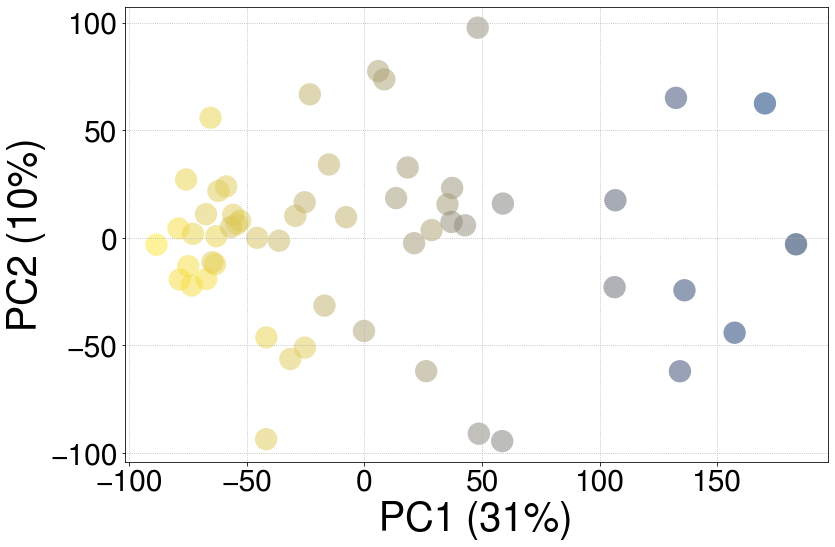

In [21]:
matplotlib.pyplot.scatter(principalDf.loc[:, 'PC1'], principalDf.loc[:, 'PC2'], c=most_likely_expressions, s=500, alpha=1/2, edgecolors='none', cmap='cividis')

matplotlib.pyplot.xlabel('PC1 ({:.0f}%)'.format(pca.explained_variance_ratio_[0]*100))
matplotlib.pyplot.ylabel('PC2 ({:.0f}%)'.format(pca.explained_variance_ratio_[1]*100))
matplotlib.pyplot.grid(ls=':')

matplotlib.pyplot.tight_layout()

# 5. Is BRCA2 there?

 BRCA2 is a [low expression gene](https://www.proteinatlas.org/ENSG00000139618-BRCA2/tissue).  
 Expression range goes from 0 to ~ 6 TPM, so a change from 0 to 5 is biologically relevant.

In [22]:
selected_genes = ['ENSG00000012048', 'ENSG00000139618', 'ENSG00000075624', 'ENSG00000111640'] # brca1, brca2, b-actin, GAPDH
toplot = substantial[selected_genes]
(2**toplot)-1

NameError: name 'substantial' is not defined